<a href="https://colab.research.google.com/github/tarekujjaman/Data-Science-Projects/blob/main/boston_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
boston= datasets.load_boston ()
df = pd.DataFrame(boston.data ,columns = boston.feature_names)
df['price']=boston.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.



Attribute Information (in order):
        
        - CRIM     per capita crime rate by town     
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - price     Median value of owner-occupied homes in $1000's



In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
df.head().to_csv("head_boston.csv")

In [ ]:
df_head = pd.read_csv("head_boston.csv")

In [ ]:
df_head.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df_head.drop(df_head.columns[[0]], axis=1, inplace=True)

In [ ]:
df_head

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df_head.iloc[0:5, [0, 1, 3,9,10,11,13]] += 44

In [ ]:
df_head.iloc[0:5, [2, 4, 5,6,7,11,12]] += .44

In [ ]:
df_head

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,44.00632,62.0,2.75,44.0,0.978,7.015,65.64,4.5300,1.0,340.0,59.3,441.34,5.42,68.0
1,44.02731,44.0,7.51,44.0,0.909,6.861,79.34,5.4071,2.0,286.0,61.8,441.34,9.58,65.6
2,44.02729,44.0,7.51,44.0,0.909,7.625,61.54,5.4071,2.0,286.0,61.8,437.27,4.47,78.7
3,44.03237,44.0,2.62,44.0,0.898,7.438,46.24,6.5022,3.0,266.0,62.7,439.07,3.38,77.4
4,44.06905,44.0,2.62,44.0,0.898,7.587,54.64,6.5022,3.0,266.0,62.7,441.34,5.77,80.2


In [ ]:
df_new = df.append(df_head,ignore_index=True)

In [ ]:
df_new

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.20,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.90,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.10,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.80,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.20,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,44.00632,62.0,2.75,44.0,0.978,7.015,65.64,4.5300,1.0,340.0,59.3,441.34,5.42,68.0
507,44.02731,44.0,7.51,44.0,0.909,6.861,79.34,5.4071,2.0,286.0,61.8,441.34,9.58,65.6
508,44.02729,44.0,7.51,44.0,0.909,7.625,61.54,5.4071,2.0,286.0,61.8,437.27,4.47,78.7
509,44.03237,44.0,2.62,44.0,0.898,7.438,46.24,6.5022,3.0,266.0,62.7,439.07,3.38,77.4


In [ ]:
df_new.shape

(511, 14)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    float64
 4   NOX      511 non-null    float64
 5   RM       511 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    float64
 9   TAX      511 non-null    float64
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  price    511 non-null    float64
dtypes: float64(14)
memory usage: 56.0 KB


In [ ]:
df_new.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,4.009012,11.718200,11.072838,0.499022,0.558254,6.294620,68.505479,3.813386,9.477495,407.068493,18.878278,357.490059,12.585264,23.036204
std,9.440396,23.491693,6.860968,4.335840,0.120785,0.707026,28.040781,2.104803,8.694994,168.142730,4.772575,91.217252,7.141716,10.478692
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.130000,0.000000,0.449000,5.887500,45.250000,2.102150,4.000000,279.000000,17.400000,375.695000,6.885000,17.100000
50%,0.263630,0.000000,9.690000,0.000000,0.538000,6.211000,77.000000,3.262800,5.000000,330.000000,19.100000,391.700000,11.280000,21.200000
75%,3.805910,17.750000,18.100000,0.000000,0.631000,6.630500,93.950000,5.222850,24.000000,666.000000,20.200000,396.315000,16.920000,25.150000
max,88.976200,100.000000,27.740000,44.000000,0.978000,8.780000,100.000000,12.126500,24.000000,711.000000,62.700000,441.340000,37.970000,80.200000


In [ ]:
df_new.isnull()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,False,False,False,False,False,False,False,False,False,False,False,False,False,False
507,False,False,False,False,False,False,False,False,False,False,False,False,False,False
508,False,False,False,False,False,False,False,False,False,False,False,False,False,False
509,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_new.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

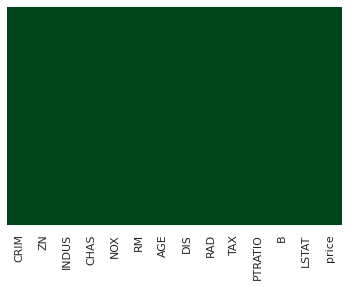

In [ ]:
sns.heatmap(df_new.isnull(),yticklabels=False, cbar = False, cmap = "Greens_r")

There are no null values in this dataset

In [ ]:
####Calculate some measures####

minimum_price = price.min()
maximum_price = price.max()
mean_price = price.mean()
# median_price = price.median()
std_price = price.std()
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $2.0
Maximum price: $2.0
Mean price: $2.0
Median price $21.2
Standard deviation of prices: $0.0


Let’s plot the distribution of the target variable Price. We will use the `distplot` function from the `seaborn` library.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


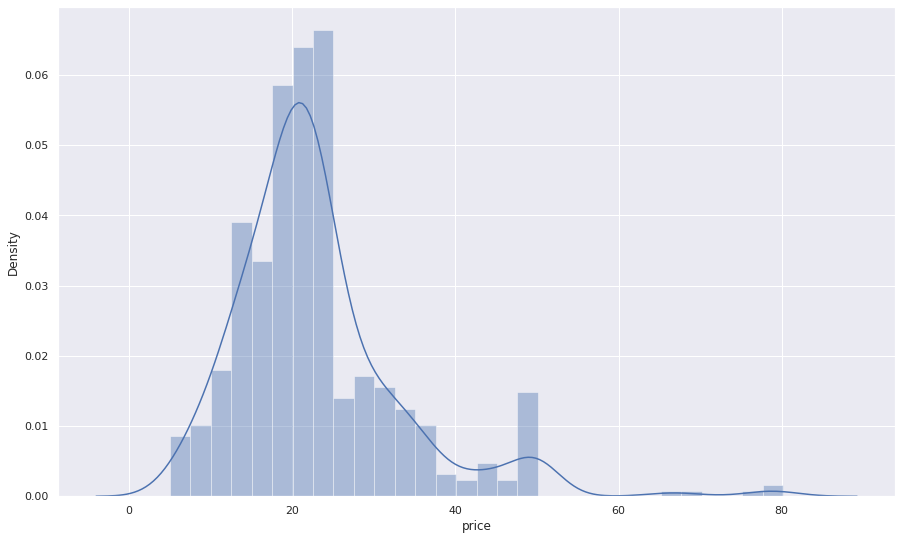

In [ ]:
sns.set(rc={'figure.figsize':(15,9)})
sns.distplot(df_new["price"], bins=30)
plt.show()

We can see that the price (target) is normally distributed with some outliers
.

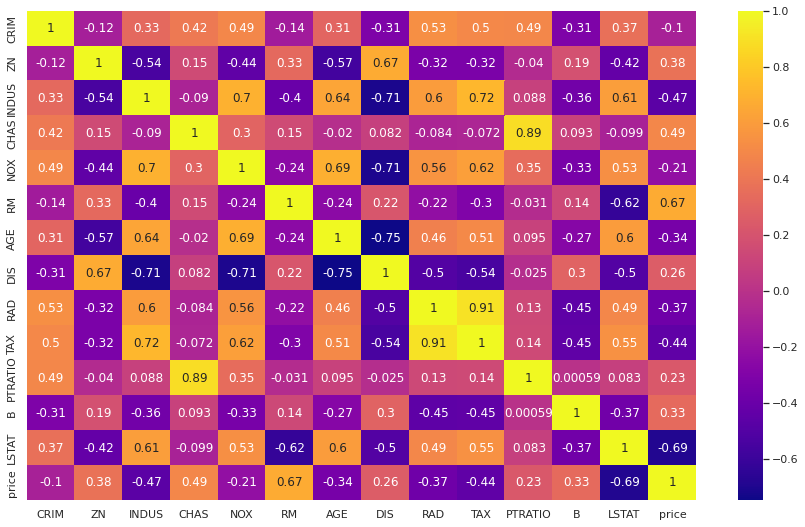

In [ ]:
##Lets see the correlations by using Seaborn

corr= df_new.corr()
plt.figure (figsize=(15,9))
sns.heatmap(corr, annot = True, cmap = 'plasma')

We can see here is the Positive relationship between **Price** and **B,PTRATIO,DIS,RM,CHAS** and **ZN**

and Negative relationship between **Price** and **LSTAT,TAX,RAD,AGE,NOX,INDUS** and **CRIM**

In [ ]:
# price = df_new["price"]

In [ ]:
# price

<Figure size 1080x648 with 0 Axes>

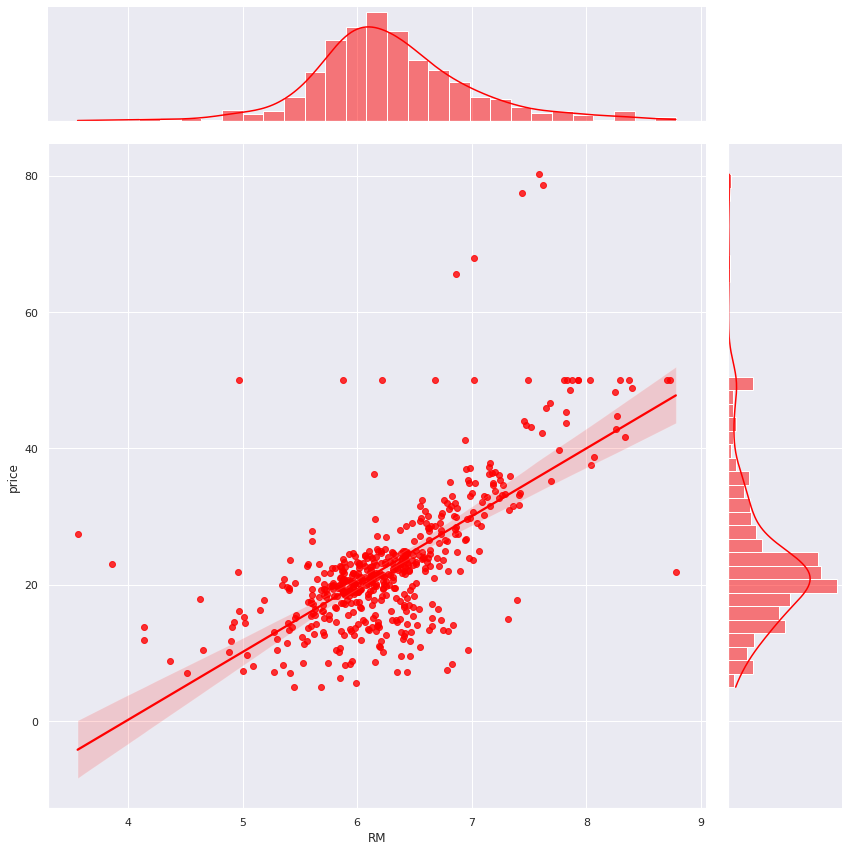

In [ ]:
###Correlation between RM and Price

plt.figure (figsize=(15,9))
sns.jointplot(x = df_new["RM"], y = df_new["price"], data = df_new, kind = 'reg', color = 'red', height = 12)

Here can see the Positive correlation between Price and RM in the dataset and data is normally distributed here.

<Figure size 1080x648 with 0 Axes>

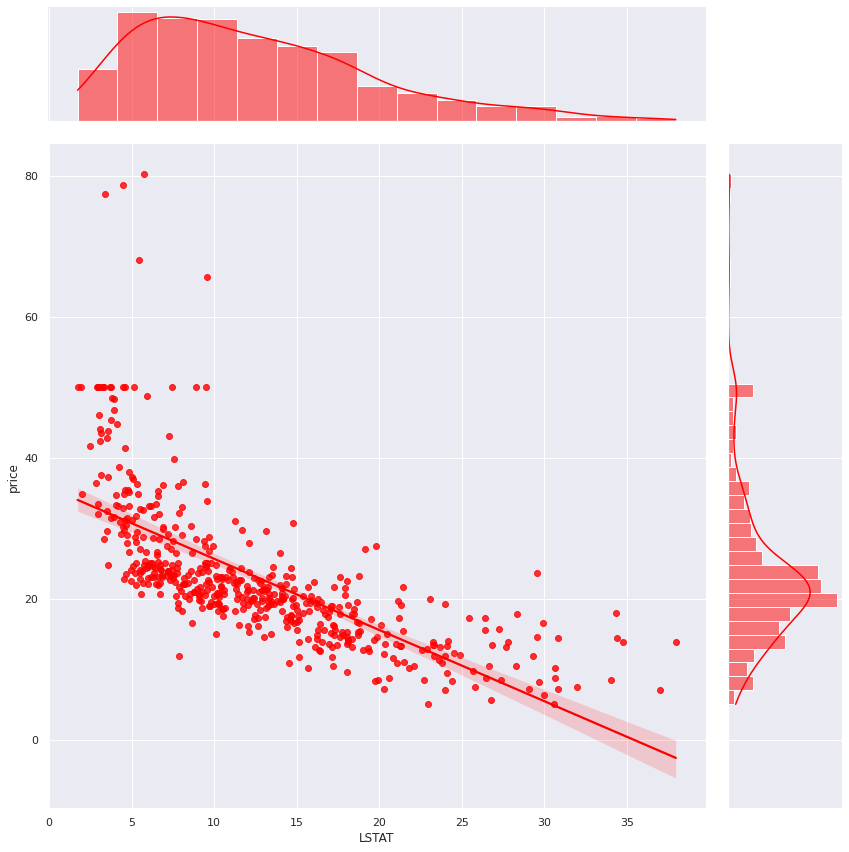

In [ ]:
###Correlation between LSTAT and Price
plt.figure (figsize=(15,9))
sns.jointplot(x = df_new["LSTAT"], y = df_new["price"], data = df_new, kind = 'reg', color = 'red', height = 12)

Here can see the Negative correlation between Price and LSTAT in the dataset.

In [ ]:
# sns.pairplot(df_new,plot_kws={'alpha': 0.6},diag_kws={'bins': 30})

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


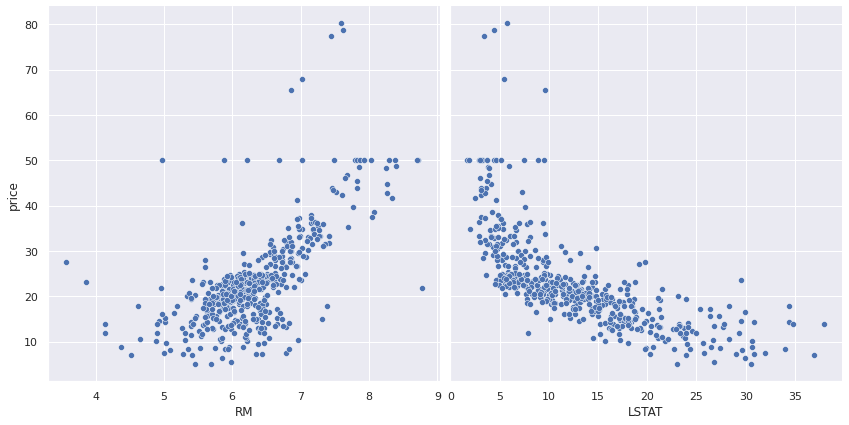

In [ ]:
sns.pairplot(df_new,x_vars=["RM","LSTAT"],y_vars=["price"],size=6)

In [ ]:
df_new['price']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
506    68.0
507    65.6
508    78.7
509    77.4
510    80.2
Name: price, Length: 511, dtype: float64

In [ ]:
# sns.pairplot(df_new,x_vars=["price"],y_vars=["price"],size=6)

In [ ]:
# df_new['price']=df_new['price'].where(df_new['price']<=20, 1)
# df_new['price']=df_new['price'].where(df_new['price'] > 20, 2)
# df_new['price']=df_new['price'].map({1:'Low', 2:'High'})

In [ ]:
df_new["price_boolian"] = df_new["price"]>=20

df_new["Price_seg"]= (df_new["price_boolian"].map({True:"1", False:"0"})).astype(float)


In [ ]:
df_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,price_boolian,Price_seg
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,True,1.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,True,1.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,True,1.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,True,1.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,True,1.0


In [ ]:
# sns.pairplot(df_new,plot_kws={'alpha': 0.6},diag_kws={'bins': 30})

In [ ]:
cols=['CRIM', 'ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B'	,'LSTAT']
X = df_new[cols]
y = df_new['Price_seg']

In [ ]:
y.dtype

dtype('float64')

In [ ]:
############################# Logistic Regression ###########################


# from sklearn.linear_model import LogisticRegression
# logmodel = LogisticRegression()
# logmodel.fit(X_train, y_train)
# y_pred=logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import statsmodels.api as sm
logitmodel=sm.Logit(y,X)
result=logitmodel.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.267444
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              Price_seg   No. Observations:                  511
Model:                          Logit   Df Residuals:                      498
Method:                           MLE   Df Model:                           12
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.6051
Time:                        21:46:07   Log-Likelihood:                -136.66
converged:                       True   LL-Null:                       -346.05
Covariance Type:            nonrobust   LLR p-value:                 3.980e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0863      0.073     -1.177      0.239      -0.230       0.057
ZN             0.0152      0

In [ ]:
X= sm.add_constant(X)
logitmodel2=sm.Logit(y,X)
result2=logitmodel2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.247887
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.634     
Dependent Variable: Price_seg        AIC:              281.3400  
Date:               2022-11-30 21:46 BIC:              340.6492  
No. Observations:   511              Log-Likelihood:   -126.67   
Df Model:           13               LL-Null:          -346.05   
Df Residuals:       497              LLR p-value:      1.4189e-85
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
------------------------------------------------------------------
             Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
------------------------------------------------------------------
const        16.8228    3.8416   4.3791  0.0000    9.2934  24.3521
CRIM         -0.0815    0.0676  -1.2056  0.2280   -0.2139   0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred=logmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
probs = logmodel.predict_proba(X_test)

preds = probs[:,1]

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82        52
         1.0       0.90      0.92      0.91       102

    accuracy                           0.88       154
   macro avg       0.87      0.86      0.87       154
weighted avg       0.88      0.88      0.88       154

[[42 10]
 [ 8 94]]
0.8831168831168831


In [ ]:
####Decision Tree#######
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
DTclf=tree.DecisionTreeClassifier()
DTclf.fit(X_train, y_train)
#####Predict probabilities for the test data.
probsDT = DTclf.predict_proba(X_test)
####Keep Probabilities of the positive class only.
probsDT = probsDT[:, 1]

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82        52
         1.0       0.90      0.92      0.91       102

    accuracy                           0.88       154
   macro avg       0.87      0.86      0.87       154
weighted avg       0.88      0.88      0.88       154

[[42 10]
 [ 8 94]]
0.8831168831168831


In [ ]:
################# RF ############################################
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
RFclf=RandomForestClassifier(n_estimators=1000)
RFclf.fit(X_train, y_train)
y_pred=RFclf.predict(X_test)

#####Predict probabilities for the test data.
probsRF = RFclf.predict_proba(X_test)

####Keep Probabilities of the positive class only.
probsRF = probsRF[:, 1]

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85        52
         1.0       0.92      0.93      0.93       102

    accuracy                           0.90       154
   macro avg       0.89      0.89      0.89       154
weighted avg       0.90      0.90      0.90       154

[[44  8]
 [ 7 95]]
0.9025974025974026


In [ ]:
####################### SVM ######################################
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
SVclf2 = SVC(kernel='rbf', C=10, gamma='auto')

#(kernel='poly', degree=4), kernel='linear', Gaussian kernel: kernel = 'rbf', kernel='sigmoid'
SVclf2.fit(X_train, y_train)
y_pred=SVclf2.predict(X_test)
probsSV = SVclf2.fit(X_train, y_train).decision_function(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.27      0.41        52
         1.0       0.72      0.97      0.83       102

    accuracy                           0.73       154
   macro avg       0.77      0.62      0.62       154
weighted avg       0.76      0.73      0.69       154

[[14 38]
 [ 3 99]]
0.7337662337662337


In [ ]:
###Compute the AUC Score.

auc = roc_auc_score(y_test, probsDT)

auc2 = roc_auc_score(y_test, probsRF)

auc3 = roc_auc_score(y_test, probsSV)

auc4 = roc_auc_score(y_test, preds)

print('DT AUC:', auc)

print('RF AUC2:', auc2)

print('SVM AUC3:', auc3)

print('LR AUC4:', auc4)

DT AUC: 0.8599170437405731
RF AUC2: 0.9660633484162896
SVM AUC3: 0.8306938159879336
LR AUC4: 0.9558823529411765


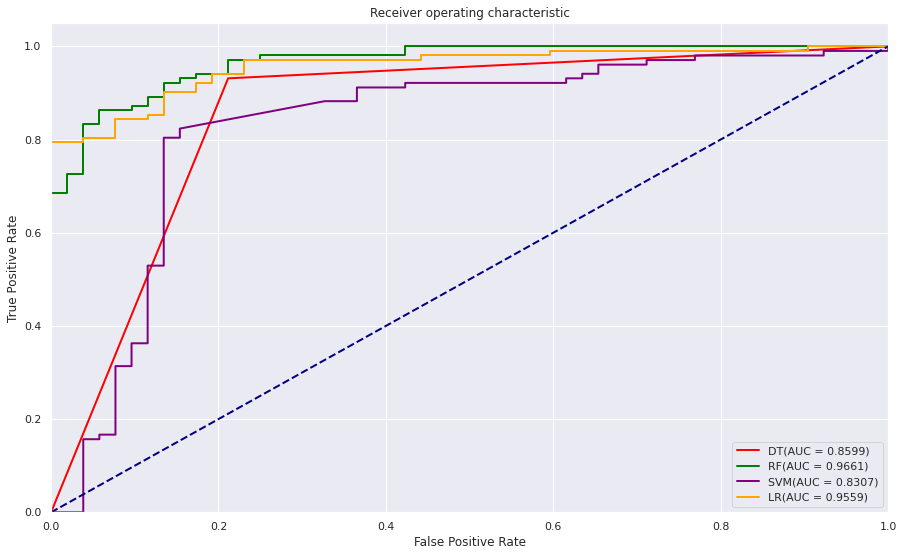

In [ ]:
###Get the ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, probsDT)

fpr2, tpr2, thresholds2 = roc_curve(y_test, probsRF)

fpr3, tpr3, thresholds3 = roc_curve(y_test, probsSV)

fpr4, tpr4, thresholds5 = roc_curve(y_test, preds)

####Plot ROC Curve 

plt.figure()

lw = 2

plt.plot(fpr, tpr, color='red',lw=lw, label='DT(AUC = %0.4f)' % auc)

plt.plot(fpr2, tpr2, color='green',lw=lw, label='RF(AUC = %0.4f)' % auc2)

plt.plot(fpr3, tpr3, color='purple',lw=lw, label='SVM(AUC = %0.4f)' % auc3)

plt.plot(fpr4, tpr4, color='orange',lw=lw, label='LR(AUC = %0.4f)' % auc4)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")

plt.show()

Here we can see Random Forest is performing better among all the other tests.